In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.stats as stats
import scipy.special
#graphing
import matplotlib.pyplot as plt
#stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

#import testing
import sys
sys.path.append("../")
import vuong_plots

In [2]:
class OLS_loglike(GenericLikelihoodModel):
    
    def __init__(self, *args,ols=False, **kwargs):
        super(OLS_loglike,self).__init__(*args,**kwargs)
        self.ols = ols

    def loglikeobs(self, params):
        y = self.endog
        x = self.exog
        mu_y = np.matmul(x,params)  
        resid = y - mu_y
        sigma = np.sqrt(np.sum(resid**2)/resid.shape[0])
        pr_y = stats.norm.logpdf( resid, loc=0,scale=sigma )
        return pr_y


def setup_shi(yn,xn,return_model=False,num_params=4):
    x1n,x2n = xn[:,0].reshape(xn.shape[0],1),xn[:,1:num_params]
    # model 1 grad, etc.
    model1 = sm.OLS(yn,sm.add_constant(x1n))
    model1_fit = model1.fit(disp=False)
    params1 = (model1_fit.params)
    
    model1_deriv = OLS_loglike(yn,sm.add_constant(x1n))
    ll1 = model1_deriv.loglikeobs(model1_fit.params)
    grad1 =  model1_deriv.score_obs(model1_fit.params)    
    hess1 = model1_deriv.hessian(model1_fit.params)
    
    #model 2 grad, etc.
    model2 = sm.OLS(yn,sm.add_constant(x2n))
    model2_fit = model2.fit(disp=False)
    params2 = (model2_fit.params)
    
    model2_deriv = OLS_loglike(yn,sm.add_constant(x2n))
    ll2 = model2_deriv.loglikeobs(model2_fit.params)
    grad2 =  model2_deriv.score_obs(model2_fit.params)    
    hess2 = model2_deriv.hessian(model2_fit.params)
    
    if return_model:
        return ll1,grad1,hess1,params1,model1,ll2,grad2,hess2,params2,model2
    return ll1,grad1,hess1,params1,ll2,grad2,hess2,params2

def gen_data(nobs=1000, a=0.0, num_params=1):
    x = np.random.normal(scale=1., size=(nobs,1+num_params))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1 + a*x[:,0] + a/np.sqrt(num_params)*x[:,1:num_params+1].sum(axis=1) + e
    return y,x,nobs

yn,xn,nobs = gen_data()
ll1,grad1,hess1,params1,ll2,grad2,hess2,params2 = setup_shi(yn,xn,return_model=False,num_params=15)
print(grad1.shape,hess1.shape)

(1000, 2) (2, 2)


# a = .25

../figs/a25_k1.png


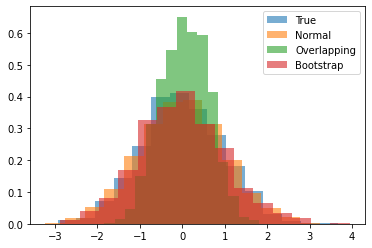

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.000 & 0.908 & 0.047 & -0.005 & 0.047 & 2.458 \\
Bootstrap & -0.001 & 0.989 & 0.209 & 0.148 & 0.209 & 3.071 \\
Normal & -0.003 & 0.993 & 0.034 & -0.090 & 0.034 & 2.868 \\
Overlapping & 0.056 & 0.321 & -0.009 & -0.037 & -0.009 & 0.272 \\
\bottomrule
\end{tabular}
\end{center}


In [3]:
a=.25
k = 1
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a25_k9.png


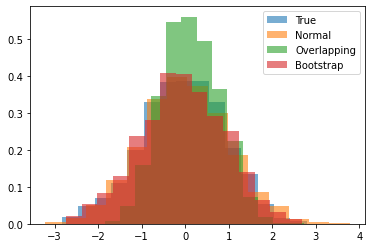

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.050 & 0.915 & -0.132 & -0.108 & -0.132 & 2.395 \\
Bootstrap & -0.056 & 0.955 & -0.077 & -0.229 & -0.076 & 2.497 \\
Normal & -0.004 & 0.982 & 0.059 & -0.033 & 0.059 & 2.860 \\
Overlapping & 0.131 & 0.429 & 0.035 & -0.031 & 0.035 & 0.520 \\
\bottomrule
\end{tabular}
\end{center}


In [4]:
a=.25
k = 9
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a25_k4.png


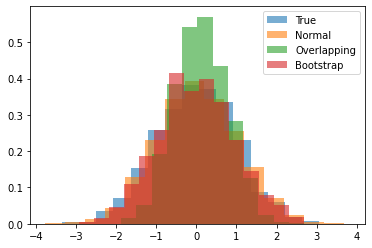

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.011 & 0.971 & -0.024 & -0.054 & -0.024 & 2.766 \\
Bootstrap & 0.004 & 0.917 & 0.044 & -0.151 & 0.044 & 2.365 \\
Normal & 0.019 & 1.004 & 0.003 & -0.051 & 0.003 & 2.971 \\
Overlapping & 0.122 & 0.438 & 0.029 & -0.016 & 0.029 & 0.558 \\
\bottomrule
\end{tabular}
\end{center}


In [5]:
a=.25
k = 4
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a25_k191.png


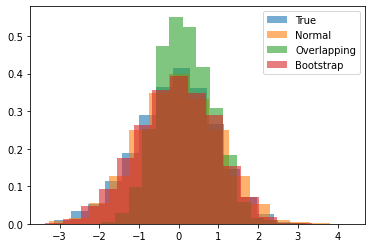

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.070 & 0.956 & -0.158 & 0.001 & -0.157 & 2.732 \\
Bootstrap & -0.061 & 0.967 & -0.117 & -0.181 & -0.117 & 2.613 \\
Normal & 0.001 & 0.987 & 0.001 & -0.006 & 0.001 & 2.913 \\
Overlapping & 0.175 & 0.470 & 0.072 & -0.030 & 0.071 & 0.632 \\
\bottomrule
\end{tabular}
\end{center}


In [6]:
a= .25
k = 19
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s1.png'%(int(a*100),k))

# a = 0

../figs/a0_k1.png


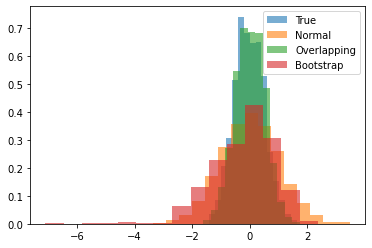

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.022 & 0.267 & 0.016 & -0.014 & 0.016 & 0.199 \\
Bootstrap & -0.223 & 1.135 & -1.188 & 3.749 & -1.185 & 7.573 \\
Normal & 0.010 & 1.009 & 0.032 & -0.012 & 0.032 & 3.039 \\
Overlapping & 0.014 & 0.264 & -0.004 & -0.009 & -0.004 & 0.200 \\
\bottomrule
\end{tabular}
\end{center}


In [7]:
a = 0
k = 1
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a0_k9.png


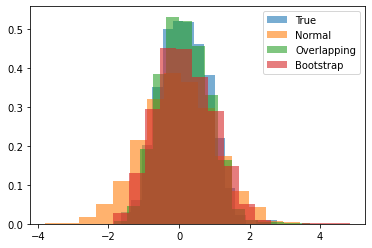

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.149 & 0.462 & 0.062 & 0.007 & 0.061 & 0.644 \\
Bootstrap & 0.176 & 0.678 & 0.277 & 0.522 & 0.276 & 1.892 \\
Normal & -0.012 & 1.015 & 0.016 & -0.073 & 0.016 & 3.017 \\
Overlapping & 0.166 & 0.470 & 0.093 & 0.057 & 0.093 & 0.717 \\
\bottomrule
\end{tabular}
\end{center}


In [8]:
a = 0
k = 9
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)
vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a0_k4.png


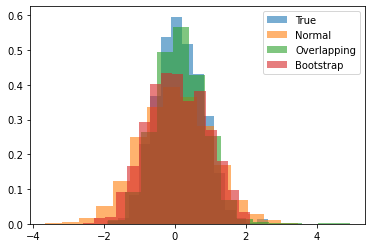

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.136 & 0.427 & 0.057 & 0.005 & 0.056 & 0.551 \\
Bootstrap & 0.064 & 0.691 & -0.001 & -0.232 & -0.001 & 1.196 \\
Normal & 0.004 & 0.971 & 0.012 & 0.003 & 0.012 & 2.829 \\
Overlapping & 0.151 & 0.475 & 0.138 & 0.346 & 0.138 & 1.020 \\
\bottomrule
\end{tabular}
\end{center}


In [9]:
a = 0
k = 4
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)
vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a0_k19.png


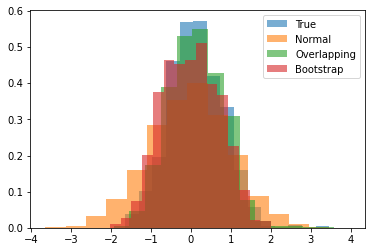

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.145 & 0.457 & 0.105 & 0.178 & 0.104 & 0.802 \\
Bootstrap & 0.006 & 0.496 & 0.019 & -0.127 & 0.019 & 0.609 \\
Normal & -0.020 & 1.010 & -0.052 & -0.037 & -0.051 & 3.023 \\
Overlapping & 0.141 & 0.449 & 0.057 & 0.057 & 0.057 & 0.661 \\
\bottomrule
\end{tabular}
\end{center}


In [10]:
a = 0
k = 19
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))